In [1]:
#Importowanie biblioteki
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

#import pandas as pd


# ustawiam lokalizację pliku chromedriver.exe kompaktybilnego z wersją chrome 
driver = webdriver.Chrome(executable_path=r"C:\WebDriver\bin\chromedriver.exe")


# wykonanie komendy "get", w tym wypadku analogicznie zadziałałoby requests.get()
# w ten sposób nawigujemy obiekt driver do strony wskazanej przez adres URL
driver.get('https://wroclaw.policja.gov.pl/dwr/form/159,Doba-w-liczbach.html?page=0')
wait = WebDriverWait(driver, 10)
wait.until(EC.presence_of_element_located((By.CLASS_NAME, "table-listing")))

tabelka = driver.find_elements_by_class_name("table-listing")

In [2]:
lines = tabelka[0].text.split('\n')

wynik = lines.copy()
kol_names = lines[0]

In [15]:
display(kol_names)

'Data Interwencje Zatrzymani na gorącym uczynku Poszukiwani (w tym nieletni) Wypadki drogowe Nietrzeźwi kierujący'

In [3]:
lista = driver.find_elements_by_id("meni_strony")


In [4]:
koniec = int(lista[0].text.split('\n')[-3])
#driver.quit()

In [6]:
for x in range(1, koniec):
    print('https://wroclaw.policja.gov.pl/dwr/form/159,Doba-w-liczbach.html?page='+str(x))

https://wroclaw.policja.gov.pl/dwr/form/159,Doba-w-liczbach.html?page=1
https://wroclaw.policja.gov.pl/dwr/form/159,Doba-w-liczbach.html?page=2
https://wroclaw.policja.gov.pl/dwr/form/159,Doba-w-liczbach.html?page=3
https://wroclaw.policja.gov.pl/dwr/form/159,Doba-w-liczbach.html?page=4
https://wroclaw.policja.gov.pl/dwr/form/159,Doba-w-liczbach.html?page=5
https://wroclaw.policja.gov.pl/dwr/form/159,Doba-w-liczbach.html?page=6
https://wroclaw.policja.gov.pl/dwr/form/159,Doba-w-liczbach.html?page=7
https://wroclaw.policja.gov.pl/dwr/form/159,Doba-w-liczbach.html?page=8
https://wroclaw.policja.gov.pl/dwr/form/159,Doba-w-liczbach.html?page=9
https://wroclaw.policja.gov.pl/dwr/form/159,Doba-w-liczbach.html?page=10
https://wroclaw.policja.gov.pl/dwr/form/159,Doba-w-liczbach.html?page=11
https://wroclaw.policja.gov.pl/dwr/form/159,Doba-w-liczbach.html?page=12
https://wroclaw.policja.gov.pl/dwr/form/159,Doba-w-liczbach.html?page=13
https://wroclaw.policja.gov.pl/dwr/form/159,Doba-w-liczbach.

In [5]:
# jest jakaś blokada na stronie uniemożliwiająca odputanie więcej niż 9x, po tym czasie należy przeładować stronkę
for x in range(1, koniec):
    #pętla w pętli: niestety coś blokuje co jakiś czas połączenie, rozłączenie i ponowne połączenie pomaga
    if x % 6 == 0:
        driver.quit()
        driver = webdriver.Chrome(executable_path=r"C:\WebDriver\bin\chromedriver.exe")
    driver.get('https://wroclaw.policja.gov.pl/dwr/form/159,Doba-w-liczbach.html?page='+str(x))
    wait = WebDriverWait(driver, 10)
    wait.until(EC.presence_of_element_located((By.CLASS_NAME, "table-listing")))
    tabelka = driver.find_elements_by_class_name("table-listing")
    lines = tabelka[0].text.split('\n')
    wynik.extend(lines[1:]) # polecenie append dodałoby całą listę jako jeden obiekt



In [11]:
heads(wynik)

NameError: name 'heads' is not defined

In [8]:
len(wynik)

362

In [9]:
len(wynik[1].split(' '))

6

In [30]:
wynik

['Data Interwencje Zatrzymani na gorącym uczynku Poszukiwani (w tym nieletni) Wypadki drogowe Nietrzeźwi kierujący',
 '2023-02-16 245 13 11 1 6',
 '2023-02-15 239 21 11 1 2',
 '2023-02-14 273 24 16 - -',
 '2023-02-13 322 23 9(2) 1 8',
 '2023-02-12 276 30 13 1 14',
 '2023-02-11 282 26 3 - 4',
 '2023-02-10 288 24 5(1) - 2',
 '2023-02-09 315 20 12(1) 1 3',
 '2023-02-08 284 23 12(1) - 4',
 '2023-02-07 259 23 13 2 2']

In [12]:
import pandas as pd

#zainicjowanie obiektu DataFrame: nazwa kolumn oraz pierwszy element tabeli
df = pd.DataFrame( [[x for x in wynik[1].split(' ')]], 
                  columns = ['Data', 'Interwencje', 'Zatrzymani_na_goracym_uczynku','Poszukiwani', 'Wypadki_drogowe', 'Nietrzezwi_kierujacy'])


# zapakowanie pozostałych elementów 
for i in range(2,len(wynik)):
    df = df.append(pd.Series(wynik[i].split(' '), index=df.columns), ignore_index=True)
  

In [13]:
df

,Data,Interwencje,Zatrzymani_na_goracym_uczynku,Poszukiwani,Wypadki_drogowe,Nietrzezwi_kierujacy
0,2023-02-16,245,13,11,1,6


In [22]:
df.head(10)
# należy zmodyfikować kolumny Wypadki_drogowe oraz Nietrzezwi_kierujacy podmieniając - na 0 



,Data,Interwencje,Zatrzymani_na_goracym_uczynku,Poszukiwani,Wypadki_drogowe,Nietrzezwi_kierujacy
0,2023-02-16,245,13,11,1,6
1,2023-02-15,239,21,11,1,2
2,2023-02-14,273,24,16,-,-
3,2023-02-13,322,23,9(2),1,8
4,2023-02-12,276,30,13,1,14
5,2023-02-11,282,26,3,-,4
6,2023-02-10,288,24,5(1),-,2
7,2023-02-09,315,20,12(1),1,3
8,2023-02-08,284,23,12(1),-,4
9,2023-02-07,259,23,13,2,2


In [23]:
df['Wypadki_drogowe'] = df['Wypadki_drogowe'].replace('-', '0')
df['Nietrzezwi_kierujacy'] = df['Nietrzezwi_kierujacy'].replace('-', '0')

df.head(10)

,Data,Interwencje,Zatrzymani_na_goracym_uczynku,Poszukiwani,Wypadki_drogowe,Nietrzezwi_kierujacy
0,2023-02-16,245,13,11,1,6
1,2023-02-15,239,21,11,1,2
2,2023-02-14,273,24,16,0,0
3,2023-02-13,322,23,9(2),1,8
4,2023-02-12,276,30,13,1,14
5,2023-02-11,282,26,3,0,4
6,2023-02-10,288,24,5(1),0,2
7,2023-02-09,315,20,12(1),1,3
8,2023-02-08,284,23,12(1),0,4
9,2023-02-07,259,23,13,2,2


In [24]:
from collections import Counter
print(sorted(Counter(df['Nietrzezwi_kierujacy']).items()))

[('0', 4), ('1', 14), ('10', 11), ('11', 21), ('12', 11), ('13', 7), ('14', 8), ('15', 4), ('16', 2), ('18', 2), ('2', 27), ('3', 42), ('4', 42), ('5', 38), ('6', 47), ('7', 26), ('8', 34), ('9', 21)]


In [25]:
from collections import Counter
print(sorted(Counter(df['Wypadki_drogowe']).items()))

[('0', 33), ('1', 79), ('2', 86), ('3', 69), ('4', 39), ('5', 35), ('6', 15), ('7', 5)]


In [31]:
# konwertuję typ danych na int

df['Wypadki_drogowe'] = df['Wypadki_drogowe'].astype(int)
df['Nietrzezwi_kierujacy'] = df['Nietrzezwi_kierujacy'].astype(int)
df['Interwencje'] = df['Interwencje'].astype(int)
df['Zatrzymani_na_goracym_uczynku'] = df['Zatrzymani_na_goracym_uczynku'].astype(int)


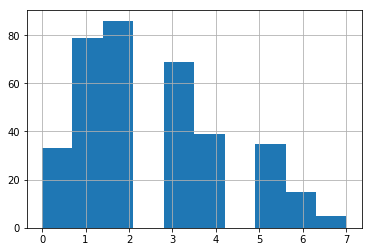

In [29]:
df['Wypadki_drogowe'].hist()

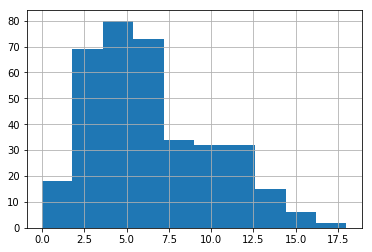

In [30]:
df['Nietrzezwi_kierujacy'].hist()

In [53]:
tmp_df = pd.DataFrame(columns=["Poszukiwani_total", "Poszukiwani_nieletni"])

In [56]:
# na koniec trzeba rozdzielić kolumnę poszukiwani na poszukiwani_total oraz poszukiwani_nieletni
tmp_df = pd.DataFrame(columns=['Poszukiwani_total', 'Poszukiwani_nieletni'])

for i in range(len(df['Poszukiwani'])):
    tmp = df['Poszukiwani'][i].split('(')
    tmp = [x.replace(')','') for x in tmp]
    # uzupełniam jeżeli nie było nieletnich poszukiwanych
    if len(tmp) < 2:
        tmp.append('0')
    tmp = [int(x) for x in tmp]
    tmp_df = tmp_df.append(pd.Series(tmp, index=tmp_df.columns), ignore_index=True)

df['Poszukiwani_total'] = tmp_df['Poszukiwani_total']
df['Poszukiwani_nieletni'] = tmp_df['Poszukiwani_nieletni']


In [58]:
df['Poszukiwani_total'] = tmp_df['Poszukiwani_total']
df['Poszukiwani_nieletni'] = tmp_df['Poszukiwani_nieletni']


In [60]:
df.head(10)

,Data,Interwencje,Zatrzymani_na_goracym_uczynku,Poszukiwani,Wypadki_drogowe,Nietrzezwi_kierujacy,Poszukiwani_total,Poszukiwani_nieletni
0,2023-02-16,245,13,11,1,6,11,0
1,2023-02-15,239,21,11,1,2,11,0
2,2023-02-14,273,24,16,0,0,16,0
3,2023-02-13,322,23,9(2),1,8,9,2
4,2023-02-12,276,30,13,1,14,13,0
5,2023-02-11,282,26,3,0,4,3,0
6,2023-02-10,288,24,5(1),0,2,5,1
7,2023-02-09,315,20,12(1),1,3,12,1
8,2023-02-08,284,23,12(1),0,4,12,1
9,2023-02-07,259,23,13,2,2,13,0


In [61]:
df.drop('Poszukiwani', axis=1, inplace=True)

In [62]:
df.head(10)

,Data,Interwencje,Zatrzymani_na_goracym_uczynku,Wypadki_drogowe,Nietrzezwi_kierujacy,Poszukiwani_total,Poszukiwani_nieletni
0,2023-02-16,245,13,1,6,11,0
1,2023-02-15,239,21,1,2,11,0
2,2023-02-14,273,24,0,0,16,0
3,2023-02-13,322,23,1,8,9,2
4,2023-02-12,276,30,1,14,13,0
5,2023-02-11,282,26,0,4,3,0
6,2023-02-10,288,24,0,2,5,1
7,2023-02-09,315,20,1,3,12,1
8,2023-02-08,284,23,0,4,12,1
9,2023-02-07,259,23,2,2,13,0


In [1]:
import pandas as pd
tmp_df = pd.DataFrame(columns=['Poszukiwani_total', 'Poszukiwani_nieletni'])

In [6]:
list(tmp_df.columns)

['Poszukiwani_total', 'Poszukiwani_nieletni']